In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data.csv')

make a subset

In [3]:
subsample_proportion = 0.01
rows_per_group = int(100*subsample_proportion)
sub_df = df.groupby(['orf_name', 'ref_name', 'filename'], group_keys=False).apply(lambda x: x.sample(min(len(x), rows_per_group)))
sub_df.to_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data_subset.csv', index=False)

In [4]:
sub_df = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/fragmented_orf/results/combined_testB_data_subset.csv')

In [5]:
sub_df

,identity_score,orf_name,ref_name,M,N,aln_len,orf_len,ref_len,N/aln_len,gap_openings,gap_ratio,aln_orf_len,filename,pair_type,len
0,0.308192,AB033691.1_rdrp_orf1_[Sorghum_chlorotic_spot_v...,DQ356949.1_rdrp_orf1_[Maracuja_mosaic_virus],532,769,1326,1000,1103,0.579940,40,0.030166,1000,rdrp_orf1_len-1000_n-100,og-tobamo,1000
1,0.400000,AB033691.1_rdrp_orf1_[Sorghum_chlorotic_spot_v...,DQ356949.1_rdrp_orf1_[Maracuja_mosaic_virus],60,100,909,100,1103,0.110011,15,0.016502,100,rdrp_orf1_len-100_n-100,og-tobamo,100
2,0.380000,AB033691.1_rdrp_orf1_[Sorghum_chlorotic_spot_v...,DQ356949.1_rdrp_orf1_[Maracuja_mosaic_virus],124,200,843,200,1103,0.237248,9,0.010676,200,rdrp_orf1_len-200_n-100,og-tobamo,200
3,0.360000,AB033691.1_rdrp_orf1_[Sorghum_chlorotic_spot_v...,DQ356949.1_rdrp_orf1_[Maracuja_mosaic_virus],192,300,1065,300,1103,0.281690,18,0.016901,300,rdrp_orf1_len-300_n-100,og-tobamo,300
4,0.341667,AB033691.1_rdrp_orf1_[Sorghum_chlorotic_spot_v...,DQ356949.1_rdrp_orf1_[Maracuja_mosaic_virus],316,480,1004,500,1103,0.478088,32,0.031873,500,rdrp_orf1_len-500_n-100,og-tobamo,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68355,0.283951,Z97873.1_rdrp_orf1_[Beet_soil-borne_virus],OR350232.1_rdrp_orf1_[Piper_chlorosis_virus],522,729,1154,800,1118,0.631716,36,0.031196,800,rdrp_orf1_len-800_n-100,og-tobamo,800
68356,0.286285,Z97873.1_rdrp_orf1_[Beet_soil-borne_virus],OR350232.1_rdrp_orf1_[Piper_chlorosis_virus],536,751,1171,825,1118,0.641332,43,0.036721,825,rdrp_orf1_len-825_n-100,og-tobamo,825
68357,0.304993,Z97873.1_rdrp_orf1_[Beet_soil-borne_virus],OR350232.1_rdrp_orf1_[Piper_chlorosis_virus],515,741,1125,850,1118,0.658667,38,0.033778,850,rdrp_orf1_len-850_n-100,og-tobamo,850
68358,0.296250,Z97873.1_rdrp_orf1_[Beet_soil-borne_virus],OR350232.1_rdrp_orf1_[Piper_chlorosis_virus],563,800,1180,900,1118,0.677966,40,0.033898,900,rdrp_orf1_len-900_n-100,og-tobamo,900


make viz

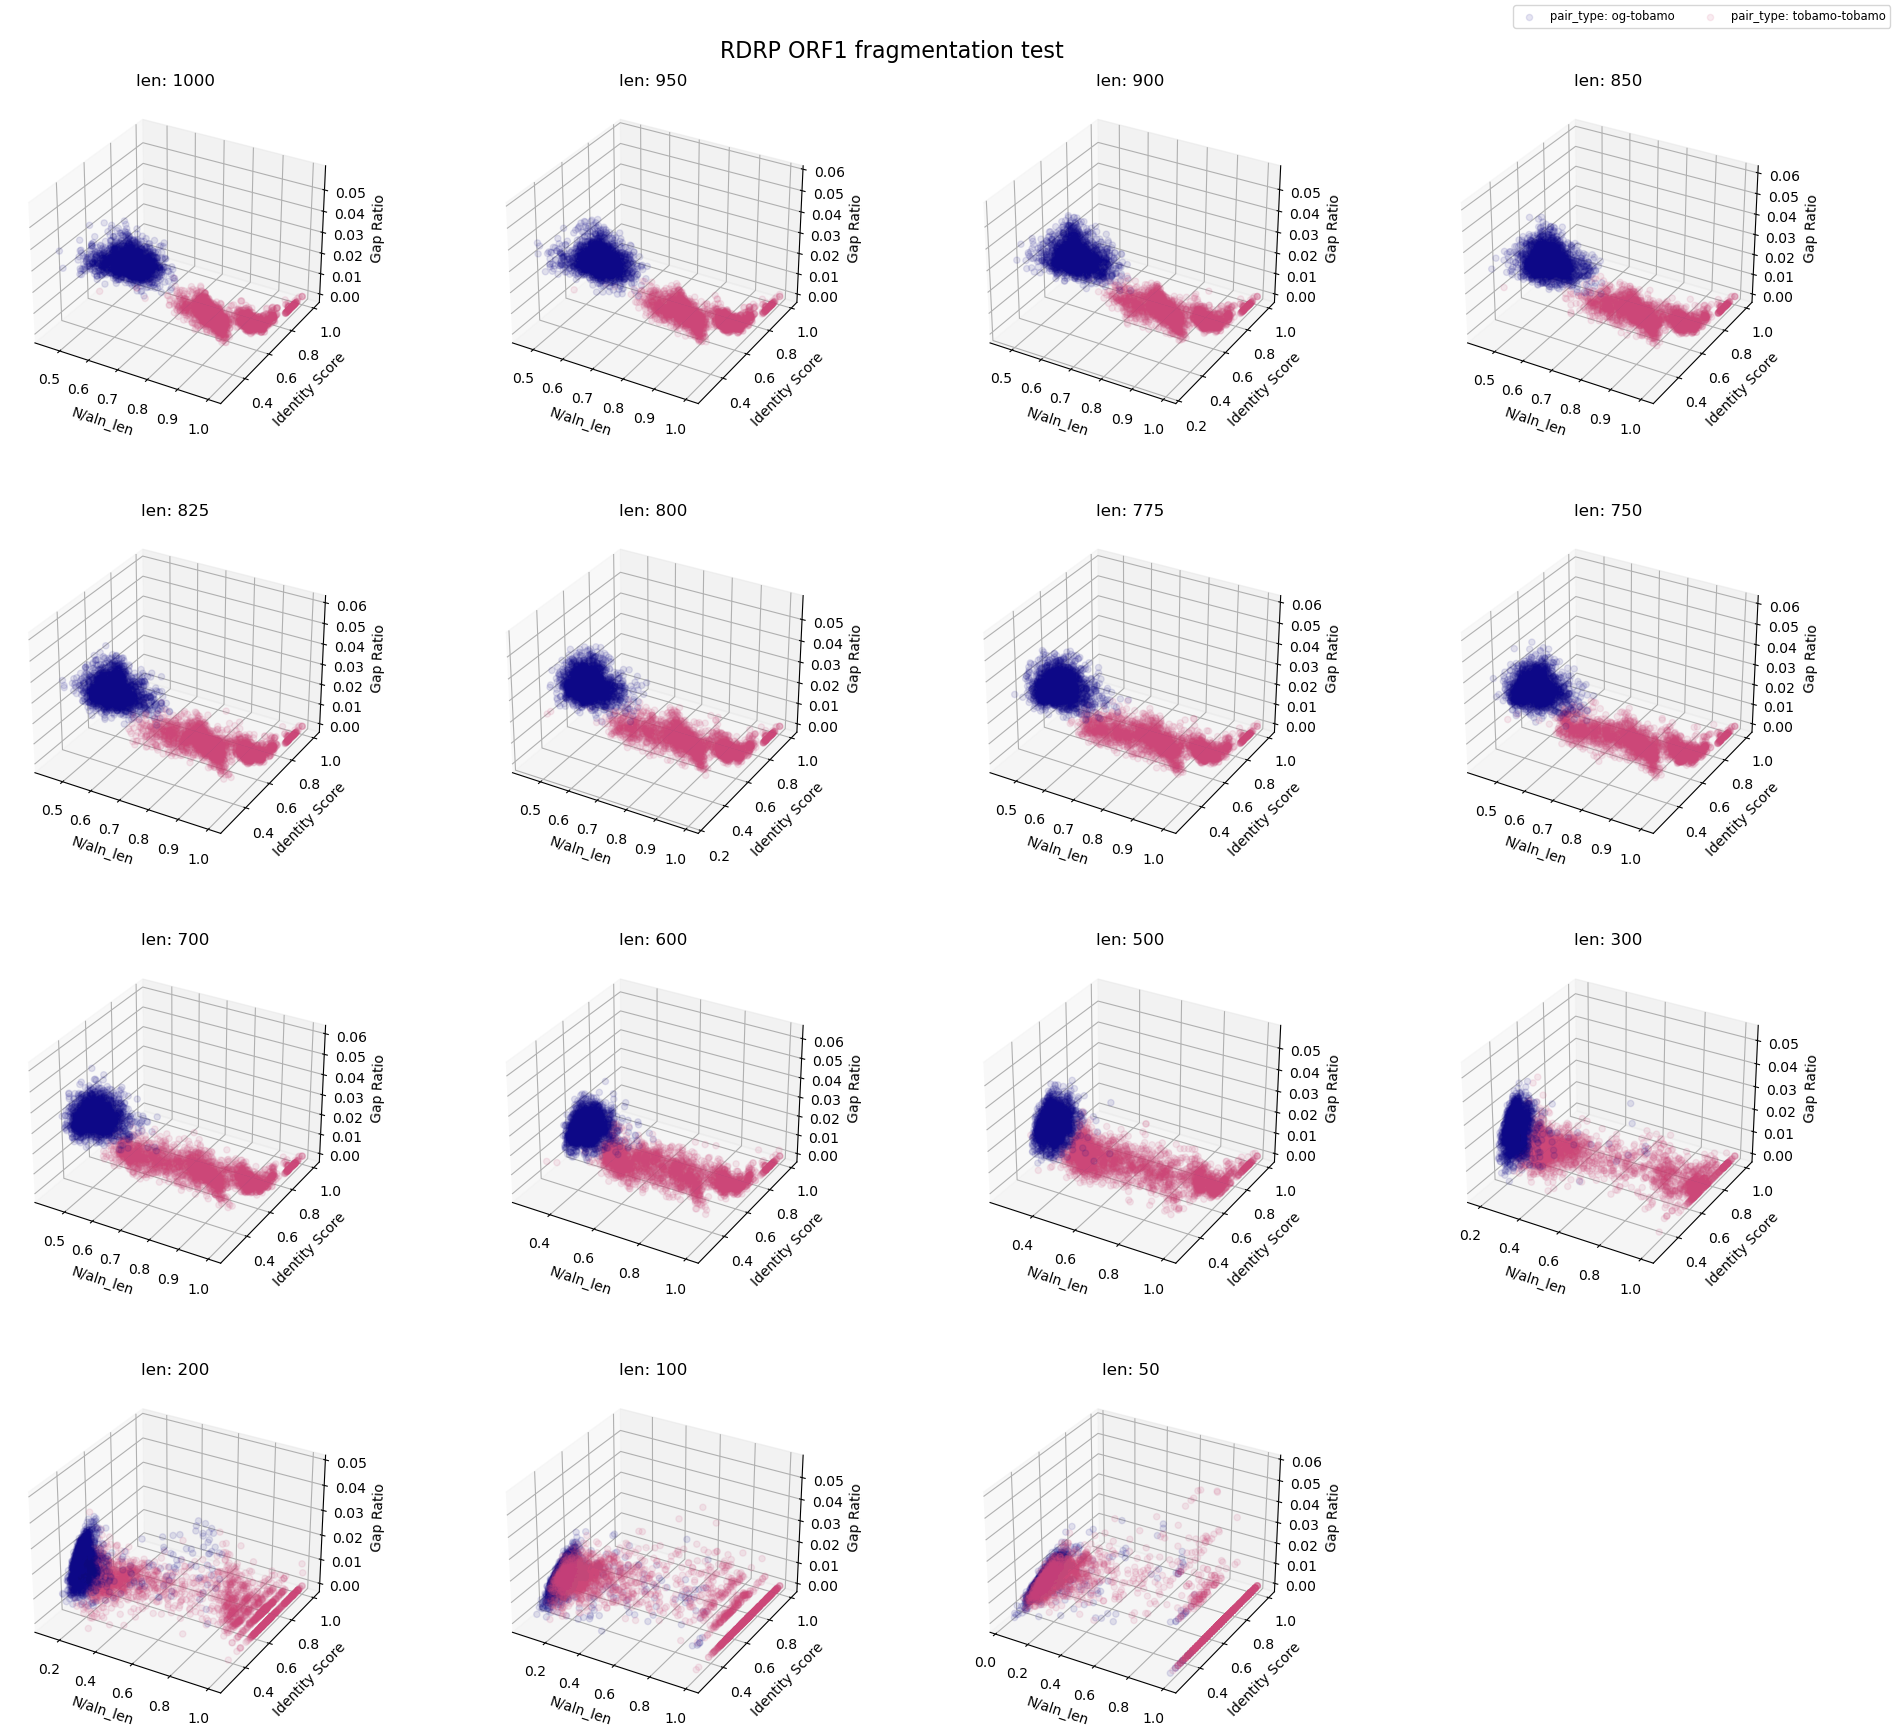

In [16]:
# Define a colormap
cmap = plt.get_cmap('plasma')
unique_pair_types = sub_df['pair_type'].unique()
sorted_lens = np.sort(sub_df['len'].unique())[::-1]  # Sort by descending len
colors = {pair_type: cmap(i / len(unique_pair_types)) for i, pair_type in enumerate(unique_pair_types)}

# Determine the grid size for subplots
num_plots = len(sorted_lens)
grid_size = int(np.ceil(np.sqrt(num_plots)))

fig = plt.figure(figsize=(20, 18))

# Plot the scatter plots
for idx, u_len in enumerate(sorted_lens):
    ax = fig.add_subplot(grid_size, grid_size, idx + 1, projection='3d')
    
    for pair_type in unique_pair_types:
        subset = sub_df[(sub_df['pair_type'] == pair_type) & (sub_df['len'] == u_len)]
        ax.scatter(subset['N/aln_len'], subset['identity_score'], subset['gap_ratio'],
                   color=colors[pair_type], alpha=0.1, label=f'pair_type: {pair_type}')
    
    # Labels and title
    ax.set_xlabel('N/aln_len')
    ax.set_ylabel('Identity Score')
    ax.set_zlabel('Gap Ratio')
    ax.set_title(f'len: {u_len}')

# Create a single legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.suptitle('RDRP ORF1 fragmentation test', fontsize=16)
fig.legend(by_label.values(), by_label.keys(), loc='upper right', fontsize='small', ncol=2)
# plt.tight_layout()
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.3, hspace=0.3)
# plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('results/testB_viz_orf1_fragmentation.png')

plt.show()